<a href="https://colab.research.google.com/github/ABDULHAI10/ABDULHAI10/blob/main/ML_Session02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
advertising= pd.read_csv('/content/advertising.csv')


In [3]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


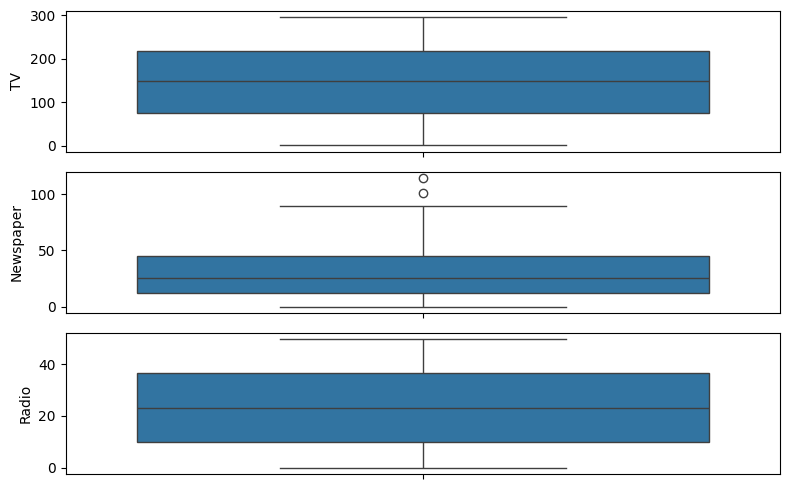

In [23]:
#Outlier Analysis
fig, axs = plt.subplots(3,1, figsize=(8,5))
plt1=sns.boxplot(advertising ['TV'], ax=axs [0])
plt2=sns.boxplot(advertising ['Newspaper'], ax=axs [1])
plt3=sns.boxplot(advertising ['Radio'], ax=axs [2])
plt.tight_layout()

**UNIVARIATE ANALYSIS**

**SALES (TARGET VARIABLE)**

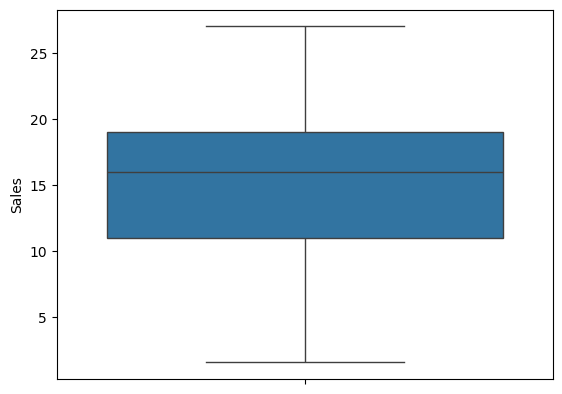

In [18]:
sns.boxplot(advertising['Sales'])
plt.show()

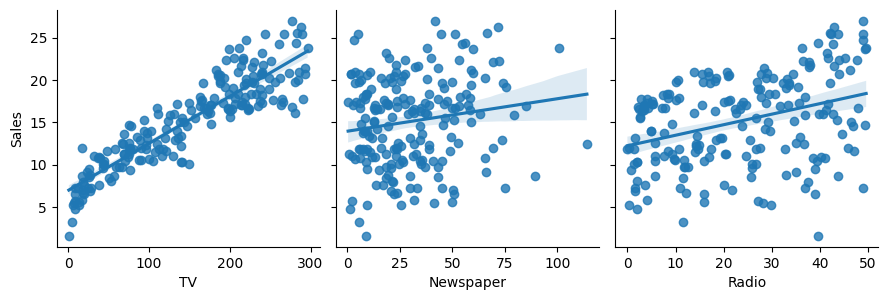

In [7]:
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=3,aspect=1,kind='reg')
plt.show()

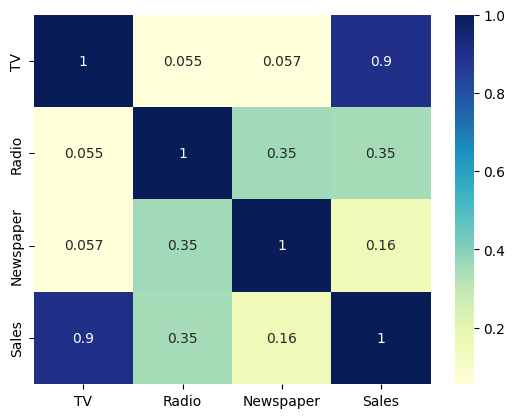

In [24]:
#lets's see the correlation between different variables
sns.heatmap(advertising.corr(),cmap='YlGnBu', annot=True)
plt.show()

In [8]:
X = advertising['TV']  # Features
y = advertising['Sales']  # Target variable

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)

TRAINING NOT TOO SMALL
     ALSO
TEST NOT TOO SMALL

if dataset is too large like 50000 then go for 80% and 20%

80 for training
20 for test

and if dataset is normal then
70 training
30 testing

90 and 10 never happened
60 and 40 i have never used

In [69]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


If your dataset has 200 rows and you use train_test_split(X, y, test_size=0.3), then:

70% of data will be used for training → 140 rows

30% of data will be used for testing → 60 rows

Calculation
Training Rows
=200×0.7=140

Training Rows=200×0.7=140

Testing Rows
=200×0.3=60



In [70]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [71]:
y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


**statsmodels** is a Python library for statistical modeling, hypothesis testing, and data exploration. It is useful for regression analysis, time series analysis, and hypothesis testing.

📌 Key Features of statsmodels
✔ Linear Regression & Multiple Regression
✔ Statistical Tests (T-tests, ANOVA, Chi-square, etc.)
✔ Time Series Analysis (ARIMA, SARIMA)
✔ Generalized Linear Models (GLM)

In [10]:
import statsmodels.api as sm

TV ---> Sale

y=mx+c

Sale = m*TV  +   c

    
m -> slope      c-> y-intercept

In [73]:
# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


#Fit the regression line using 'OLS' ordinary least squares
lr = sm.OLS(y_train, X_train_sm).fit()

In [74]:
# Print the parameters i.e the intercept and the slope of the regression line fitted
lr.params

,0
const,6.948683
TV,0.054546


In [75]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.52e-52
Time:                        19:07:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

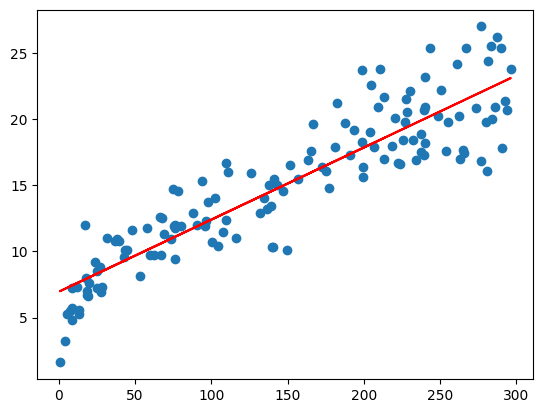

In [11]:
plt.scatter(X_train, y_train)
plt.plot (X_train,  6.9487 + 0.0545*X_train,'r')
plt.show()